<a href="https://colab.research.google.com/github/gcamfer/Anomaly-ReactionRL/blob/master/Notebooks/AE_RL_awid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AE-RL for AWID

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import backend as K
import json
from sklearn.utils import shuffle
import os
import sys
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score,recall_score, precision_score

Using TensorFlow backend.


### Using dataset from google drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

# Dataset path

In [3]:
!tar -xvzf "/content/gdrive/My Drive/my_datasets/AWID-CLS-R-Trn.tar.gz"
!tar -xvzf "/content/gdrive/My Drive/my_datasets/AWID-CLS-R-Tst.tar.gz"

AWID-CLS-R-Trn/
AWID-CLS-R-Trn/1
AWID-CLS-R-Tst/
AWID-CLS-R-Tst/1


In [4]:
!mkdir splitted

train_path = "splitted/train.csv"
test_path = "splitted/test.csv"

mkdir: cannot create directory ‘splitted’: File exists


In [0]:
names = ["frame.interface_id" ,"frame.dlt" ,"frame.offset_shift","frame.time_epoch" ,
        "frame.time_delta" ,"frame.time_delta_displayed" ,"frame.time_relative" ,
         "frame.len" ,"frame.cap_len" ,"frame.marked" ,"frame.ignored" ,"radiotap.version" ,
    "radiotap.pad" ,"radiotap.length" ,"radiotap.present.tsft" ,"radiotap.present.flags" ,"radiotap.present.rate" ,
    "radiotap.present.channel" ,"radiotap.present.fhss" ,"radiotap.present.dbm_antsignal" ,"radiotap.present.dbm_antnoise" ,
    "radiotap.present.lock_quality" ,"radiotap.present.tx_attenuation" ,"radiotap.present.db_tx_attenuation" ,
    "radiotap.present.dbm_tx_power" ,"radiotap.present.antenna" ,"radiotap.present.db_antsignal" ,"radiotap.present.db_antnoise" ,
    "radiotap.present.rxflags" ,"radiotap.present.xchannel" ,"radiotap.present.mcs" ,"radiotap.present.ampdu" ,"radiotap.present.vht" ,
    "radiotap.present.reserved" ,"radiotap.present.rtap_ns" ,"radiotap.present.vendor_ns" ,"radiotap.present.ext" ,
    "radiotap.mactime" ,"radiotap.flags.cfp" ,"radiotap.flags.preamble" ,"radiotap.flags.wep" ,"radiotap.flags.frag" ,
    "radiotap.flags.fcs" ,"radiotap.flags.datapad" ,"radiotap.flags.badfcs" ,"radiotap.flags.shortgi" ,"radiotap.datarate" ,
    "radiotap.channel.freq" ,"radiotap.channel.type.turbo" ,"radiotap.channel.type.cck" ,"radiotap.channel.type.ofdm" ,
    "radiotap.channel.type.2ghz" ,"radiotap.channel.type.5ghz" ,"radiotap.channel.type.passive" ,"radiotap.channel.type.dynamic" ,
    "raÇdiotap.channel.type.gfsk" ,"radiotap.channel.type.gsm" ,"radiotap.channel.type.sturbo" ,"radiotap.channel.type.half" ,
    "radiotap.channel.type.quarter" ,"radiotap.dbm_antsignal" ,"radiotap.antenna" ,"radiotap.rxflags.badplcp" ,"wlan.fc.type_subtype" ,
    "wlan.fc.version" ,"wlan.fc.type" ,"wlan.fc.subtype" ,"wlan.fc.ds" ,"wlan.fc.frag" ,"wlan.fc.retry" ,"wlan.fc.pwrmgt" ,
    "wlan.fc.moredata" ,"wlan.fc.protected" ,"wlan.fc.order" ,"wlan.duration" ,"wlan.ra" ,"wlan.da" ,"wlan.ta" ,"wlan.sa" ,
    "wlan.bssid" ,"wlan.frag" ,"wlan.seq" ,"wlan.bar.type" ,"wlan.ba.control.ackpolicy" ,"wlan.ba.control.multitid" ,
    "wlan.ba.control.cbitmap" ,"wlan.bar.compressed.tidinfo" ,"wlan.ba.bm" ,"wlan.fcs_good" ,"wlan_mgt.fixed.capabilities.ess" ,
    "wlan_mgt.fixed.capabilities.ibss" ,"wlan_mgt.fixed.capabilities.cfpoll.ap" ,"wlan_mgt.fixed.capabilities.privacy" ,
    "wlan_mgt.fixed.capabilities.preamble" ,"wlan_mgt.fixed.capabilities.pbcc" ,"wlan_mgt.fixed.capabilities.agility" ,
    "wlan_mgt.fixed.capabilities.spec_man" ,"wlan_mgt.fixed.capabilities.short_slot_time" ,"wlan_mgt.fixed.capabilities.apsd" ,
    "wlan_mgt.fixed.capabilities.radio_measurement" ,"wlan_mgt.fixed.capabilities.dsss_ofdm" ,"wlan_mgt.fixed.capabilities.del_blk_ack" ,
    "wlan_mgt.fixed.capabilities.imm_blk_ack" ,"wlan_mgt.fixed.listen_ival" ,"wlan_mgt.fixed.current_ap" ,"wlan_mgt.fixed.status_code" ,
    "wlan_mgt.fixed.timestamp" ,"wlan_mgt.fixed.beacon" ,"wlan_mgt.fixed.aid" ,"wlan_mgt.fixed.reason_code" ,"wlan_mgt.fixed.auth.alg" ,
    "wlan_mgt.fixed.auth_seq" ,"wlan_mgt.fixed.category_code" ,"wlan_mgt.fixed.htact" ,"wlan_mgt.fixed.chanwidth" ,
    "wlan_mgt.fixed.fragment" ,"wlan_mgt.fixed.sequence" ,"wlan_mgt.tagged.all" ,"wlan_mgt.ssid" ,"wlan_mgt.ds.current_channel" ,
    "wlan_mgt.tim.dtim_count" ,"wlan_mgt.tim.dtim_period" ,"wlan_mgt.tim.bmapctl.multicast" ,"wlan_mgt.tim.bmapctl.offset" ,
    "wlan_mgt.country_info.environment" ,"wlan_mgt.rsn.version" ,"wlan_mgt.rsn.gcs.type" ,"wlan_mgt.rsn.pcs.count" ,
    "wlan_mgt.rsn.akms.count" ,"wlan_mgt.rsn.akms.type" ,"wlan_mgt.rsn.capabilities.preauth" ,"wlan_mgt.rsn.capabilities.no_pairwise" ,
    "wlan_mgt.rsn.capabilities.ptksa_replay_counter" ,"wlan_mgt.rsn.capabilities.gtksa_replay_counter" ,"wlan_mgt.rsn.capabilities.mfpr" ,
    "wlan_mgt.rsn.capabilities.mfpc" ,"wlan_mgt.rsn.capabilities.peerkey" ,"wlan_mgt.tcprep.trsmt_pow" ,"wlan_mgt.tcprep.link_mrg" ,
    "wlan.wep.iv" ,"wlan.wep.key" ,"wlan.wep.icv" ,"wlan.tkip.extiv" ,"wlan.ccmp.extiv" ,"wlan.qos.tid" ,"wlan.qos.priority" ,
    "wlan.qos.eosp" ,"wlan.qos.ack" ,"wlan.qos.amsdupresent" ,"wlan.qos.buf_state_indicated" ,"wlan.qos.bit4" ,
    "wlan.qos.txop_dur_req" ,"wlan.qos.buf_state_indicated" ,"data.len" ,"class"]

Load the unique features used

In [0]:
colnames_good_df = pd.read_csv("/content/gdrive/My Drive/my_datasets/Awid/colnames_good.csv",names=["colnames"])
colnames_good = colnames_good_df['colnames'].tolist()

In [7]:
train = pd.read_csv("AWID-CLS-R-Trn/1", names=names, usecols=colnames_good)

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [8]:
test = pd.read_csv("AWID-CLS-R-Tst/1", names=names, usecols=colnames_good)

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


### Preprocessing

In [9]:
print(train.shape)
print(test.shape)

(1795575, 49)
(575643, 49)


In [10]:
train_indx = train.shape[0]

df = train.append(test, ignore_index=True)

# Remove labels column
labels = df['class']
df = df.drop('class',axis=1)

print("Dataset without labels shape:{}".format(df.shape))


# Processing categorical and numerical columns
num_cols = list(df._get_numeric_data().columns)
cat_cols = list(set(df.columns)-set(num_cols))


# Normalization of the df
#log_cols = self.df.filter(like='logarithm').columns
#nat_cols =  list(set(self.df.columns)-set(log_cols))
#self.df.reset_index()
df[num_cols] = (df[num_cols]-df[num_cols].min())/(df[num_cols].max()-df[num_cols].min())


for name_col in cat_cols:
    df = pd.concat([df.drop(name_col, axis=1), pd.get_dummies(df[name_col],prefix=name_col)], axis=1)

print("Dataset with categoricals encoded:{}".format(df.shape))

# If na max and min = 0 so delete column
df = df.dropna(axis=1)

# Delete row
#self.df = self.df.dropna(axis=0)
print("Dataset dropping nan:{}".format(df.shape))

# Add labels again
df['labels']=labels


print("Dataset with labels again:{}".format(df.shape))


train = df.iloc[:train_indx]
test = df.iloc[train_indx:]

Dataset without labels shape:(2371218, 48)
Dataset with categoricals encoded:(2371218, 70)
Dataset dropping nan:(2371218, 46)
Dataset with labels again:(2371218, 47)


In [11]:
print(train.shape)
print(test.shape)

(1795575, 47)
(575643, 47)


In [0]:
train.to_csv(train_path,index=False)
test.to_csv(test_path,index=False)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795575 entries, 0 to 1795574
Data columns (total 47 columns):
frame.time_epoch                        float64
frame.time_delta                        float64
frame.time_delta_displayed              float64
frame.time_relative                     float64
frame.len                               float64
frame.cap_len                           float64
radiotap.length                         float64
radiotap.present.tsft                   float64
radiotap.present.flags                  float64
radiotap.present.channel                float64
radiotap.present.dbm_antsignal          float64
radiotap.present.antenna                float64
radiotap.present.rxflags                float64
radiotap.datarate                       float64
wlan.fc.type                            float64
wlan.fc.subtype                         float64
wlan.fc.frag                            float64
wlan.fc.retry                           float64
wlan.fc.pwrmgt         

In [14]:
train.describe()

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,...,wlan.fc.type_subtype_0x18,wlan.fc.type_subtype_0x19,wlan.fc.type_subtype_0x1a,wlan.fc.type_subtype_0x1b,wlan.fc.type_subtype_0x1c,wlan.fc.type_subtype_0x1d,wlan.fc.type_subtype_0x20,wlan.fc.type_subtype_0x24,wlan.fc.type_subtype_0x28,wlan.fc.type_subtype_0x2c
count,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,...,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06
mean,2.312808e-01,5.723385e-03,5.723385e-03,5.195880e-01,3.106633e-01,3.106633e-01,9.995656e-01,9.995656e-01,9.995656e-01,9.995656e-01,...,1.280927e-05,4.344012e-05,6.638542e-04,7.100789e-04,1.999694e-02,2.321902e-01,1.302697e-01,1.033875e-02,3.683216e-01,5.524693e-04
std,1.072683e-01,1.821356e-02,1.821356e-02,2.409856e-01,4.345912e-01,4.345912e-01,2.083777e-02,2.083777e-02,2.083777e-02,2.083777e-02,...,3.578982e-03,6.590771e-03,2.575682e-02,2.663785e-02,1.399895e-01,4.222298e-01,3.366000e-01,1.011527e-01,4.823494e-01,2.349818e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.271072e-01,8.993242e-04,8.993242e-04,2.855550e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.352776e-01,1.567394e-03,1.567394e-03,5.285670e-01,4.705882e-02,4.705882e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.121584e-01,3.177612e-03,3.177612e-03,7.012848e-01,9.882353e-01,9.882353e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,4.451235e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575643 entries, 1795575 to 2371217
Data columns (total 47 columns):
frame.time_epoch                        575643 non-null float64
frame.time_delta                        575643 non-null float64
frame.time_delta_displayed              575643 non-null float64
frame.time_relative                     575643 non-null float64
frame.len                               575643 non-null float64
frame.cap_len                           575643 non-null float64
radiotap.length                         575643 non-null float64
radiotap.present.tsft                   575643 non-null float64
radiotap.present.flags                  575643 non-null float64
radiotap.present.channel                575643 non-null float64
radiotap.present.dbm_antsignal          575643 non-null float64
radiotap.present.antenna                575643 non-null float64
radiotap.present.rxflags                575643 non-null float64
radiotap.datarate                       575643 non

In [0]:
num_cols = list(train._get_numeric_data().columns)
cat_cols = list(set(train.columns)-set(num_cols))

In [17]:
len(num_cols)

46

In [18]:
train.shape

(1795575, 47)

In [0]:
class data_cls:
    def __init__(self,train_test):
        
       
        self.index = 0
        if(train_test=="train"):
          self.train_path = train_path
        else:
          self.train_path = test_path
       
   
        self.df = pd.read_csv(self.train_path,sep=',')
    

         # One hot encoding for labels
        self.df = pd.concat([self.df.drop('labels', axis=1),
                pd.get_dummies(self.df['labels'])], axis=1)
        

        self.attack_types = ['normal', 'flooding', 'injection', 'impersonation']
        self.all_attack_types = ['normal', 'flooding', 'injection', 'impersonation']
        self.attack_names = ['normal', 'flooding', 'injection', 'impersonation']
        

        self.attack_map =   { 'normal': 'normal','flooding': 'flooding', 'injection':'injection', 'impersonation':'impersonation'}
        
        self.all_attack_names = list(self.attack_map.keys())

        self.df = self.df.sample(frac=1)


    def get_shape(self):
              
        self.data_shape = self.df.shape
        # stata + labels
        return self.data_shape
    
    ''' Get n-rows from loaded data 
        The dataset must be loaded in RAM
    '''
    def get_batch(self,batch_size=100):
                
        # Read the df rows
        indexes = list(range(self.index,self.index+batch_size))    
        if max(indexes)>self.data_shape[0]-1:
            dif = max(indexes)-self.data_shape[0]
            indexes[len(indexes)-dif-1:len(indexes)] = list(range(dif+1))
            self.index=batch_size-dif
            batch = self.df.iloc[indexes]
        else: 
            batch = self.df.iloc[indexes]
            self.index += batch_size    
            
        labels = batch[self.attack_names]
        
        batch = batch.drop(self.all_attack_names,axis=1)
            
        return batch,labels
    
    def get_full(self):
              
        labels = self.df[self.attack_names]
        
        batch = self.df.drop(self.all_attack_names,axis=1)
        

        return batch,labels
  

In [0]:
# Huber loss function        
def huber_loss(y_true, y_pred, clip_value=1):
    # Huber loss, see https://en.wikipedia.org/wiki/Huber_loss and
    # https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b
    # for details.
    assert clip_value > 0.

    x = y_true - y_pred
    if np.isinf(clip_value):
        # Spacial case for infinity since Tensorflow does have problems
        # if we compare `K.abs(x) < np.inf`.
        return .5 * K.square(x)

    condition = K.abs(x) < clip_value
    squared_loss = .5 * K.square(x)
    linear_loss = clip_value * (K.abs(x) - .5 * clip_value)
    if K.backend() == 'tensorflow':
        import tensorflow as tf
        if hasattr(tf, 'select'):
            return tf.select(condition, squared_loss, linear_loss)  # condition, true, false
        else:
            return tf.where(condition, squared_loss, linear_loss)  # condition, true, false
    elif K.backend() == 'theano':
        from theano import tensor as T
        return T.switch(condition, squared_loss, linear_loss)
    else:
        raise RuntimeError('Unknown backend "{}".'.format(K.backend()))

# Needed for keras huber_loss locate
import keras.losses
keras.losses.huber_loss = huber_loss


In [0]:
class QNetwork():
    """
    Q-Network Estimator
    Represents the global model for the table
    """

    def __init__(self,obs_size,num_actions,hidden_size = 100,
                 hidden_layers = 1,learning_rate=.2):
        """
        Initialize the network with the provided shape
        """
        self.obs_size = obs_size
        self.num_actions = num_actions
        
        # Network arquitecture
        self.model = Sequential()
        # Add imput layer
        self.model.add(Dense(hidden_size, input_shape=(obs_size,),
                             activation='relu'))
        # Add hidden layers
        for layers in range(hidden_layers):
            self.model.add(Dense(hidden_size, activation='relu'))
        # Add output layer    
        self.model.add(Dense(num_actions))
        
        #optimizer = optimizers.SGD(learning_rate)
        # optimizer = optimizers.Adam(alpha=learning_rate)
        optimizer = optimizers.Adam(0.00025)
        # optimizer = optimizers.RMSpropGraves(learning_rate, 0.95, self.momentum, 1e-2)
        
        # Compilation of the model with optimizer and loss
        self.model.compile(loss=huber_loss,optimizer=optimizer)

    def predict(self,state,batch_size=1):
        """
        Predicts action values.
        """
        return self.model.predict(state,batch_size=batch_size)

    def update(self, states, q):
        """
        Updates the estimator with the targets.

        Args:
          states: Target states
          q: Estimated values

        Returns:
          The calculated loss on the batch.
        """
        loss = self.model.train_on_batch(states, q)
        return loss
    
    def copy_model(model):
        """Returns a copy of a keras model."""
        model.save('tmp_model')
        return keras.models.load_model('tmp_model')


In [0]:
#Policy interface
class Policy:
    def __init__(self, num_actions, estimator):
        self.num_actions = num_actions
        self.estimator = estimator
    
class Epsilon_greedy(Policy):
    def __init__(self,estimator ,num_actions ,epsilon,min_epsilon,decay_rate, epoch_length):
        Policy.__init__(self, num_actions, estimator)
        self.name = "Epsilon Greedy"
        
        if (epsilon is None or epsilon < 0 or epsilon > 1):
            print("EpsilonGreedy: Invalid value of epsilon", flush = True)
            sys.exit(0)
        self.epsilon = epsilon
        self.min_epsilon = min_epsilon
        self.actions = list(range(num_actions))
        self.step_counter = 0
        self.epoch_length = epoch_length
        self.decay_rate = decay_rate
        
        #if epsilon is up 0.1, it will be decayed over time
        if self.epsilon > 0.01:
            self.epsilon_decay = True
        else:
            self.epsilon_decay = False
    
    def get_actions(self,states):
        # get next action
        if np.random.rand() <= self.epsilon:
            actions = np.random.randint(0, self.num_actions,states.shape[0])
        else:
            self.Q = self.estimator.predict(states,states.shape[0])
            actions = []
            for row in range(self.Q.shape[0]):
                best_actions = np.argwhere(self.Q[row] == np.amax(self.Q[row]))
                actions.append(best_actions[np.random.choice(len(best_actions))].item())
            
        self.step_counter += 1 
        # decay epsilon after each epoch
        if self.epsilon_decay:
            if self.step_counter % self.epoch_length == 0:
                self.epsilon = max(self.min_epsilon, self.epsilon * self.decay_rate**self.step_counter)
            
        return actions

In [0]:
class ReplayMemory(object):
    """Implements basic replay memory"""

    def __init__(self, observation_size, max_size):
        self.observation_size = observation_size
        self.num_observed = 0
        self.max_size = max_size
        self.samples = {
                 'obs'      : np.zeros(self.max_size * 1 * self.observation_size,
                                       dtype=np.float32).reshape(self.max_size,self.observation_size),
                 'action'   : np.zeros(self.max_size * 1, dtype=np.int16).reshape(self.max_size, 1),
                 'reward'   : np.zeros(self.max_size * 1).reshape(self.max_size, 1),
                 'terminal' : np.zeros(self.max_size * 1, dtype=np.int16).reshape(self.max_size, 1),
               }

    def observe(self, state, action, reward, done):
        index = self.num_observed % self.max_size
        self.samples['obs'][index, :] = state
        self.samples['action'][index, :] = action
        self.samples['reward'][index, :] = reward
        self.samples['terminal'][index, :] = done

        self.num_observed += 1

    def sample_minibatch(self, minibatch_size):
        max_index = min(self.num_observed, self.max_size) - 1
        sampled_indices = np.random.randint(max_index, size=minibatch_size)

        s      = np.asarray(self.samples['obs'][sampled_indices, :], dtype=np.float32)
        s_next = np.asarray(self.samples['obs'][sampled_indices+1, :], dtype=np.float32)

        a      = self.samples['action'][sampled_indices].reshape(minibatch_size)
        r      = self.samples['reward'][sampled_indices].reshape((minibatch_size, 1))
        done   = self.samples['terminal'][sampled_indices].reshape((minibatch_size, 1))

        return (s, a, r, s_next, done)

In [0]:
'''
Reinforcement learning Agent definition
'''

class Agent(object):  
        
    def __init__(self, actions,obs_size, policy="EpsilonGreedy", **kwargs):
        self.actions = actions
        self.num_actions = len(actions)
        self.obs_size = obs_size
        
        self.epsilon = kwargs.get('epsilon', 1)
        self.min_epsilon = kwargs.get('min_epsilon', .1)
        self.gamma = kwargs.get('gamma', .001)
        self.minibatch_size = kwargs.get('minibatch_size', 2)
        self.epoch_length = kwargs.get('epoch_length', 100)
        self.decay_rate = kwargs.get('decay_rate',0.99)
        self.ExpRep = kwargs.get('ExpRep',True)
        if self.ExpRep:
            self.memory = ReplayMemory(self.obs_size, kwargs.get('mem_size', 10))
        
        self.ddqn_time = 100
        self.ddqn_update = self.ddqn_time

        
        self.model_network = QNetwork(self.obs_size, self.num_actions,
                                      kwargs.get('hidden_size', 100),
                                      kwargs.get('hidden_layers',1),
                                      kwargs.get('learning_rate',.2))
        self.target_model_network = QNetwork(self.obs_size, self.num_actions,
                                      kwargs.get('hidden_size', 100),
                                      kwargs.get('hidden_layers',1),
                                      kwargs.get('learning_rate',.2))
        self.target_model_network.model = QNetwork.copy_model(self.model_network.model)
        
        if policy == "EpsilonGreedy":
            self.policy = Epsilon_greedy(self.model_network,len(actions),
                                         self.epsilon,self.min_epsilon,
                                         self.decay_rate,self.epoch_length)
        
        
    def learn(self, states, actions,next_states, rewards, done):
        if self.ExpRep:
            self.memory.observe(states, actions, rewards, done)
        else:
            self.states = states
            self.actions = actions
            self.next_states = next_states
            self.rewards = rewards
            self.done = done        
    def update_model(self):
        if self.ExpRep:
            (states, actions, rewards, next_states, done) = self.memory.sample_minibatch(self.minibatch_size)
        else:
            states = self.states
            rewards = self.rewards
            next_states = self.next_states
            actions = self.actions
            done = self.done
        
        next_actions = []
        # Compute Q targets
#        Q_prime = self.model_network.predict(next_states,self.minibatch_size)
        Q_prime = self.target_model_network.predict(next_states,self.minibatch_size)
        # TODO: fix performance in this loop
        for row in range(Q_prime.shape[0]):
            best_next_actions = np.argwhere(Q_prime[row] == np.amax(Q_prime[row]))
            next_actions.append(best_next_actions[np.random.choice(len(best_next_actions))].item())
        sx = np.arange(len(next_actions))
        # Compute Q(s,a)
        Q = self.model_network.predict(states,self.minibatch_size)
        # Q-learning update
        # target = reward + gamma * max_a'{Q(next_state,next_action))}
        targets = rewards.reshape(Q[sx,actions].shape) + \
                  self.gamma * Q[sx,next_actions] * \
                  (1-done.reshape(Q[sx,actions].shape))   
        Q[sx,actions] = targets  
        
        loss = self.model_network.model.train_on_batch(states,Q)#inputs,targets        
        
        # timer to ddqn update
        self.ddqn_update -= 1
        if self.ddqn_update == 0:
            self.ddqn_update = self.ddqn_time
#            self.target_model_network.model = QNetwork.copy_model(self.model_network.model)
            self.target_model_network.model.set_weights(self.model_network.model.get_weights()) 
        
        return loss    

    def act(self, state,policy):
        raise NotImplementedError

In [0]:
class DefenderAgent(Agent):      
    def __init__(self, actions, obs_size, policy="EpsilonGreedy", **kwargs):
        super().__init__(actions,obs_size, policy="EpsilonGreedy", **kwargs)
        
    def act(self,states):
        # Get actions under the policy
        actions = self.policy.get_actions(states)
        return actions
    
class AttackAgent(Agent):      
    def __init__(self, actions, obs_size, policy="EpsilonGreedy", **kwargs):
        super().__init__(actions,obs_size, policy="EpsilonGreedy", **kwargs)
        
    def act(self,states):
        # Get actions under the policy
        actions = self.policy.get_actions(states)
        return actions

In [0]:
'''
Reinforcement learning Enviroment Definition
'''
class RLenv(data_cls):
    def __init__(self,train_test,**kwargs):
        data_cls.__init__(self,train_test)
        self.data_shape = data_cls.get_shape(self)
        self.batch_size = kwargs.get('batch_size',1) # experience replay -> batch = 1
        self.iterations_episode = kwargs.get('iterations_episode',10)
        

    '''
    _update_state: function to update the current state
    Returns:
        None
    Modifies the self parameters involved in the state:
        self.state and self.labels
    Also modifies the true labels to get learning knowledge
    '''
    def _update_state(self):        
        self.states,self.labels = data_cls.get_batch(self)
        
        # Update statistics
        self.true_labels += np.sum(self.labels).values

    '''
    Returns:
        + Observation of the enviroment
    '''
    def reset(self):
        # Statistics
        self.def_true_labels = np.zeros(len(self.attack_types),dtype=int)
        self.def_estimated_labels = np.zeros(len(self.attack_types),dtype=int)
        self.att_true_labels = np.zeros(len(self.attack_names),dtype=int)
        
        self.state_numb = 0
        
        self.states,self.labels = data_cls.get_batch(self,self.batch_size)
        
        self.total_reward = 0
        self.steps_in_episode = 0
        return self.states.values 
   
    '''
    Returns:
        State: Next state for the game
        Reward: Actual reward
        done: If the game ends (no end in this case)
    
    In the adversarial enviroment, it's only needed to return the actual reward
    '''    
    def act(self,defender_actions,attack_actions):
        # Clear previous rewards        
        self.att_reward = np.zeros(len(attack_actions))       
        self.def_reward = np.zeros(len(defender_actions))
        
        
        attack = [self.attack_types.index(self.attack_map[self.attack_names[att]]) for att in attack_actions]
        
        self.def_reward = (np.asarray(defender_actions)==np.asarray(attack))*1
        self.att_reward = (np.asarray(defender_actions)!=np.asarray(attack))*1

         
       
        self.def_estimated_labels += np.bincount(defender_actions,minlength=len(self.attack_types))
        # TODO
        # list comprehension
        
        for act in attack_actions:
            self.def_true_labels[self.attack_types.index(self.attack_map[self.attack_names[act]])] += 1
        

        # Get new state and new true values 
        attack_actions = attacker_agent.act(self.states)
        self.states = env.get_states(attack_actions)
        
        # Done allways false in this continuous task       
        self.done = np.zeros(len(attack_actions),dtype=bool)
            
        return self.states, self.def_reward,self.att_reward, attack_actions, self.done
    
    '''
    Provide the actual states for the selected attacker actions
    Parameters:
        self:
        attacker_actions: optimum attacks selected by the attacker
            it can be one of attack_names list and select random of this
    Returns:
        State: Actual state for the selected attacks
    '''
    def get_states(self,attacker_actions):
        first = True
        for attack in attacker_actions:
            if first:
                minibatch = (self.df[self.df[self.attack_names[attack]]==1].sample(1))
                first = False
            else:
                minibatch=minibatch.append(self.df[self.df[self.attack_names[attack]]==1].sample(1))
        
        self.labels = minibatch[self.attack_names]
        minibatch.drop(self.all_attack_names,axis=1,inplace=True)
        self.states = minibatch
        
        return self.states



In [87]:
if __name__ == "__main__":
  
   
    
    # Train batch
    batch_size = 1
    # batch of memory ExpRep
    minibatch_size = 10
    ExpRep = True
    
    iterations_episode = 100
  
    # Initialization of the enviroment
    env = RLenv("train",batch_size=batch_size,
                iterations_episode=iterations_episode)    
    # obs_size = size of the state
    obs_size = env.data_shape[1]-len(env.all_attack_names)
    
    #num_episodes = int(env.data_shape[0]/(iterations_episode)/10)
    num_episodes = 100
    
    '''
    Definition for the defensor agent.
    '''
    defender_valid_actions = list(range(len(env.attack_types))) # only detect type of attack
    defender_num_actions = len(defender_valid_actions)    
    
	
    def_epsilon = 1 # exploration
    min_epsilon = 0.01 # min value for exploration
    def_gamma = 0.001
    def_decay_rate = 0.999
    
    def_hidden_size = 100
    def_hidden_layers = 2
    
    def_learning_rate = .01
    
    defender_agent = DefenderAgent(defender_valid_actions,obs_size,"EpsilonGreedy",
                          epoch_length = iterations_episode,
                          epsilon = def_epsilon,
                          min_epsilon = min_epsilon,
                          decay_rate = def_decay_rate,
                          gamma = def_gamma,
                          hidden_size=def_hidden_size,
                          hidden_layers=def_hidden_layers,
                          minibatch_size = minibatch_size,
                          mem_size = 1000,
                          learning_rate=def_learning_rate,
                          ExpRep=ExpRep)
    #Pretrained defender
    #defender_agent.model_network.model.load_weights("models/type_model.h5")    
    
    '''
    Definition for the attacker agent.
    In this case the exploration is better to be greater
    The correlation sould be greater too so gamma bigger
    '''
    attack_valid_actions = list(range(len(env.attack_names)))
    attack_num_actions = len(attack_valid_actions)
	
    att_epsilon = 1
    min_epsilon = 0.99 # min value for exploration

    att_gamma = 0.001
    att_decay_rate = 0.99
    
    att_hidden_layers = 1
    att_hidden_size = 100
    
    att_learning_rate = 0.2
    
    attacker_agent = AttackAgent(attack_valid_actions,obs_size,"EpsilonGreedy",
                          epoch_length = iterations_episode,
                          epsilon = att_epsilon,
                          min_epsilon = min_epsilon,
                          decay_rate = att_decay_rate,
                          gamma = att_gamma,
                          hidden_size=att_hidden_size,
                          hidden_layers=att_hidden_layers,
                          minibatch_size = minibatch_size,
                          mem_size = 1000,
                          learning_rate=att_learning_rate,
                          ExpRep=ExpRep)
    
        
    
    # Statistics
    att_reward_chain = []
    def_reward_chain = []
    att_loss_chain = []
    def_loss_chain = []
    def_total_reward_chain = []
    att_total_reward_chain = []
    
	# Print parameters
    print("-------------------------------------------------------------------------------")
    print("Total epoch: {} | Iterations in epoch: {}"
          "| Minibatch from mem size: {} | Total Samples: {}|".format(num_episodes,
                         iterations_episode,minibatch_size,
                         num_episodes*iterations_episode))
    print("-------------------------------------------------------------------------------")
    print("Dataset shape: {}".format(env.data_shape))
    print("-------------------------------------------------------------------------------")
    print("Attacker parameters: Num_actions={} | gamma={} |" 
          " epsilon={} | ANN hidden size={} | "
          "ANN hidden layers={}|".format(attack_num_actions,
                             att_gamma,att_epsilon, att_hidden_size,
                             att_hidden_layers))
    print("-------------------------------------------------------------------------------")
    print("Defense parameters: Num_actions={} | gamma={} | "
          "epsilon={} | ANN hidden size={} |"
          " ANN hidden layers={}|".format(defender_num_actions,
                              def_gamma,def_epsilon,def_hidden_size,
                              def_hidden_layers))
    print("-------------------------------------------------------------------------------")

    # Main loop
    attacks_by_epoch = []
    attack_labels_list = []
    for epoch in range(num_episodes):
        start_time = time.time()
        att_loss = 0.
        def_loss = 0.
        def_total_reward_by_episode = 0
        att_total_reward_by_episode = 0
        # Reset enviromet, actualize the data batch with random state/attacks
        states = env.reset()
        
        # Get actions for actual states following the policy
        attack_actions = attacker_agent.act(states)
        states = env.get_states(attack_actions)    
        
        done = False
       
        attacks_list = []
        # Iteration in one episode
        for i_iteration in range(iterations_episode):
            
            attacks_list.append(attack_actions[0])
            # apply actions, get rewards and new state
            act_time = time.time()  
            defender_actions = defender_agent.act(states)
            #Enviroment actuation for this actions
            next_states,def_reward, att_reward,next_attack_actions, done = env.act(defender_actions,attack_actions)
            # If the epoch*batch_size*iterations_episode is largest than the df

            
            attacker_agent.learn(states,attack_actions,next_states,att_reward,done)
            defender_agent.learn(states,defender_actions,next_states,def_reward,done)
            
            act_end_time = time.time()
            
            # Train network, update loss after at least minibatch_learns
            if ExpRep and epoch*iterations_episode + i_iteration >= minibatch_size:
                def_loss += defender_agent.update_model()
                att_loss += attacker_agent.update_model()
            elif not ExpRep:
                def_loss += defender_agent.update_model()
                att_loss += attacker_agent.update_model()
                

            update_end_time = time.time()

            # Update the state
            states = next_states
            attack_actions = next_attack_actions
            
            
            # Update statistics
            def_total_reward_by_episode += np.sum(def_reward,dtype=np.int32)
            att_total_reward_by_episode += np.sum(att_reward,dtype=np.int32)
        
        attacks_by_epoch.append(attacks_list)
        # Update user view
        def_reward_chain.append(def_total_reward_by_episode) 
        att_reward_chain.append(att_total_reward_by_episode) 
        def_loss_chain.append(def_loss)
        att_loss_chain.append(att_loss) 

        
        end_time = time.time()
        print("\r\n|Epoch {:03d}/{:03d}| time: {:2.2f}|\r\n"
                "|Def Loss {:4.4f} | Def Reward in ep {:03d}|\r\n"
                "|Att Loss {:4.4f} | Att Reward in ep {:03d}|"
                .format(epoch, num_episodes,(end_time-start_time), 
                def_loss, def_total_reward_by_episode,
                att_loss, att_total_reward_by_episode))
        
        
        print("|Def Estimated: {}| Att Labels: {}".format(env.def_estimated_labels,
              env.def_true_labels))
        attack_labels_list.append(env.def_true_labels)

-------------------------------------------------------------------------------
Total epoch: 100 | Iterations in epoch: 100| Minibatch from mem size: 10 | Total Samples: 10000|
-------------------------------------------------------------------------------
Dataset shape: (1795575, 50)
-------------------------------------------------------------------------------
Attacker parameters: Num_actions=4 | gamma=0.001 | epsilon=1 | ANN hidden size=100 | ANN hidden layers=1|
-------------------------------------------------------------------------------
Defense parameters: Num_actions=4 | gamma=0.001 | epsilon=1 | ANN hidden size=100 | ANN hidden layers=2|
-------------------------------------------------------------------------------

|Epoch 000/100| time: 15.46|
|Def Loss 1.6468 | Def Reward in ep 022|
|Att Loss 2.5482 | Att Reward in ep 078|
|Def Estimated: [28 28 20 24]| Att Labels: [26 20 26 28]

|Epoch 001/100| time: 13.09|
|Def Loss 0.7339 | Def Reward in ep 034|
|Att Loss 2.4797 | Att 

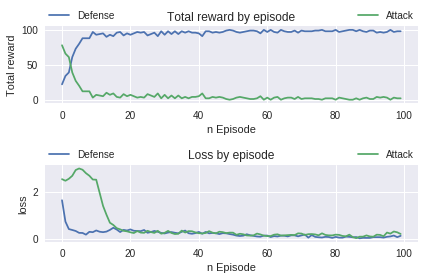

In [88]:
if not os.path.exists('models'):
    os.makedirs('models')
# Save trained model weights and architecture, used in test
defender_agent.model_network.model.save_weights("models/defender_agent_model.h5", overwrite=True)
with open("models/defender_agent_model.json", "w") as outfile:
    json.dump(defender_agent.model_network.model.to_json(), outfile)


    
if not os.path.exists('results'):
    os.makedirs('results')    
# Plot training results
plt.figure(1)
plt.subplot(211)
plt.plot(np.arange(len(def_reward_chain)),def_reward_chain,label='Defense')
plt.plot(np.arange(len(att_reward_chain)),att_reward_chain,label='Attack')
plt.title('Total reward by episode')
plt.xlabel('n Episode')
plt.ylabel('Total reward')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(212)
plt.plot(np.arange(len(def_loss_chain)),def_loss_chain,label='Defense')
plt.plot(np.arange(len(att_loss_chain)),att_loss_chain,label='Attack')
plt.title('Loss by episode')
plt.xlabel('n Episode')
plt.ylabel('loss')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
plt.tight_layout()
#plt.show()
plt.savefig('results/train_adv.tif', format='tif', dpi=100)

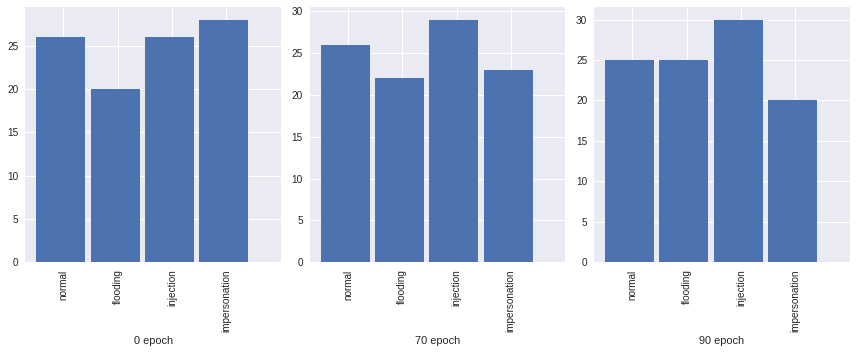

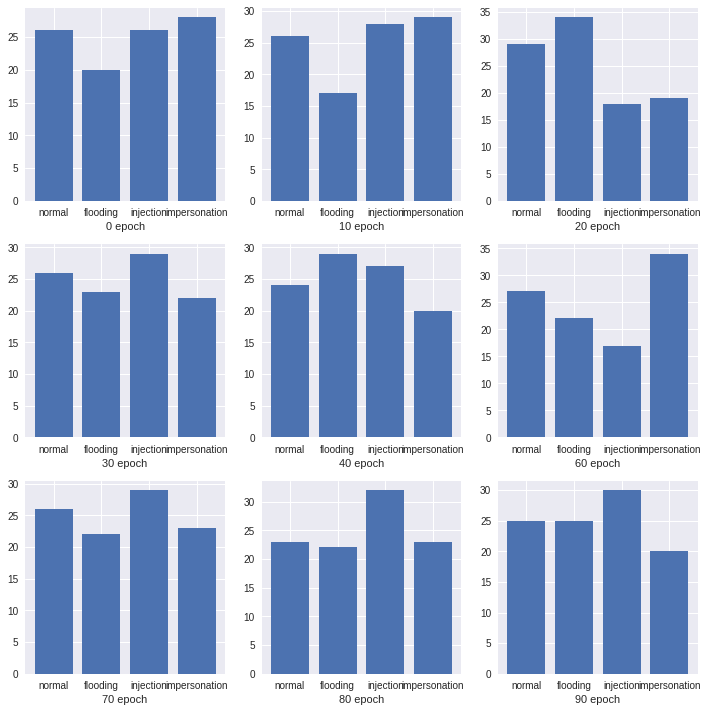

In [89]:
bins=np.arange(5) -0.5
# Plot attacks distribution alongside
plt.figure(2,figsize=[12,5])
plt.title("Attacks distribution throughout  episodes")
for indx,e in enumerate([0,70,90]):
    plt.subplot(1,3,indx+1)
    plt.hist(attacks_by_epoch[e],bins=bins,width=0.9,align='left')
    plt.xlabel("{} epoch".format(e))
    plt.xticks(bins, env.attack_names, rotation=90)


plt.tight_layout()
plt.savefig('results/Attacks_distribution.svg', format='svg', dpi=1000)


 # Plot attacks distribution alongside
plt.figure(3,figsize=[10,10])
plt.title("Attacks (mapped) distribution throughout  episodes")
for indx,e in enumerate([0,10,20,30,40,60,70,80,90]):
    plt.subplot(3,3,indx+1)
    plt.bar(range(4),attack_labels_list[e],tick_label =['normal', 'flooding', 'injection', 'impersonation'])
    plt.xlabel("{} epoch".format(e))
plt.tight_layout()
plt.savefig('results/Attacks_mapped_distribution.tif', format='tif', dpi=100)

# TEST

In [0]:
from keras.models import model_from_json

import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import  confusion_matrix

In [0]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.grid(None)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [0]:

with open("models/defender_agent_model.json", "r") as jfile:
    model = model_from_json(json.load(jfile))
model.load_weights("models/defender_agent_model.h5")

model.compile(loss=huber_loss,optimizer="sgd")


# Define environment, game, make sure the batch_size is the same in train
env_test = RLenv('test')


total_reward = 0    


true_labels = np.zeros(len(env_test.attack_types),dtype=int)
estimated_labels = np.zeros(len(env_test.attack_types),dtype=int)
estimated_correct_labels = np.zeros(len(env_test.attack_types),dtype=int)

#states , labels = env.get_sequential_batch(test_path,batch_size = env.batch_size)
states , labels = env_test.get_full()


start_time=time.time()
q = model.predict(states)
actions = np.argmax(q,axis=1)        

In [93]:
maped=[]
for indx,label in labels.iterrows():
    maped.append(env_test.attack_types.index(env_test.attack_map[label.idxmax()]))

labels,counts = np.unique(maped,return_counts=True)
true_labels[labels] += counts



for indx,a in enumerate(actions):
    estimated_labels[a] +=1              
    if a == maped[indx]:
        total_reward += 1
        estimated_correct_labels[a] += 1


action_dummies = pd.get_dummies(actions)
posible_actions = np.arange(len(env_test.attack_types))
for non_existing_action in posible_actions:
    if non_existing_action not in action_dummies.columns:
        action_dummies[non_existing_action] = np.uint8(0)
labels_dummies = pd.get_dummies(maped)

normal_f1_score = f1_score(labels_dummies[0].values,action_dummies[0].values)
flooding_f1_score = f1_score(labels_dummies[1].values,action_dummies[1].values)
injection_f1_score = f1_score(labels_dummies[2].values,action_dummies[2].values)
impersonation_f1_score = f1_score(labels_dummies[3].values,action_dummies[3].values)
    

Accuracy = [normal_f1_score,flooding_f1_score,injection_f1_score,impersonation_f1_score]
Mismatch = estimated_labels - true_labels

acc = float(100*total_reward/len(states))
print('\r\nTotal reward: {} | Number of samples: {} | Accuracy = {:.2f}%'.format(total_reward,
      len(states),acc))
outputs_df = pd.DataFrame(index = env_test.attack_types,columns = ["Estimated","Correct","Total","F1_score"])
for indx,att in enumerate(env_test.attack_types):
   outputs_df.iloc[indx].Estimated = estimated_labels[indx]
   outputs_df.iloc[indx].Correct = estimated_correct_labels[indx]
   outputs_df.iloc[indx].Total = true_labels[indx]
   outputs_df.iloc[indx].F1_score = Accuracy[indx]*100
   outputs_df.iloc[indx].Mismatch = abs(Mismatch[indx])
    
    
print(outputs_df)


Total reward: 541131 | Number of samples: 575643 | Accuracy = 94.00%
              Estimated Correct   Total F1_score
normal           524979  510626  530785  96.7311
flooding           5296    5006    8097  74.7555
injection         17825   16681   16682  96.6818
impersonation     27543    8818   20079  37.0333


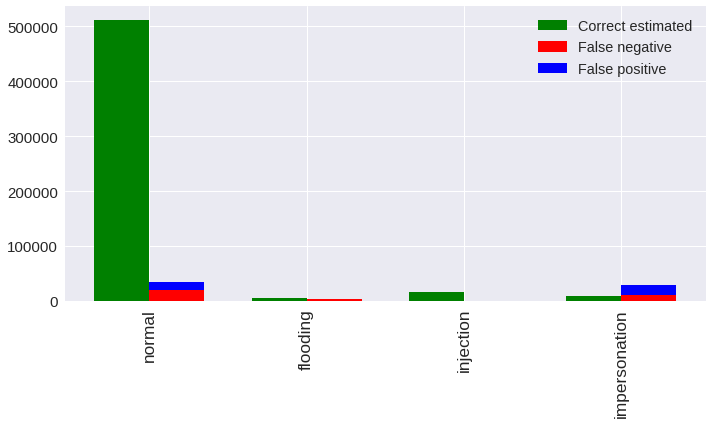

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
width = 0.35
pos = np.arange(len(true_labels))
p1 = plt.bar(pos, estimated_correct_labels,width,color='g')
p1 = plt.bar(pos+width,
             (np.abs(estimated_correct_labels-true_labels)),width,
             color='r')
p2 = plt.bar(pos+width,np.abs(estimated_labels-estimated_correct_labels),width,
             bottom=(np.abs(estimated_correct_labels-true_labels)),
             color='b')

ax.yaxis.set_tick_params(labelsize=15)
ax.set_xticks(pos+width/2)
ax.set_xticklabels(env.attack_types,rotation='vertical',fontsize = 'xx-large')

#ax.set_yscale('log')

#ax.set_ylim([0, 100])
#ax.set_title('Test set scores',fontsize = 'xx-large')
#ax.set_title('Test set scores, Acc = {:.2f}'.format(acc))
plt.legend(('Correct estimated','False negative','False positive'),fontsize = 'x-large')
plt.tight_layout()
#plt.show()
plt.savefig('results/test_adv_imp.tif', format='tif', dpi=100)


In [95]:
estimated_correct_labels

array([510626,   5006,  16681,   8818])

In [96]:
estimated_labels

array([524979,   5296,  17825,  27543])

In [97]:
true_labels

array([530785,   8097,  16682,  20079])

In [98]:
np.abs(estimated_correct_labels-true_labels) # false negative

array([20159,  3091,     1, 11261])

In [99]:
np.abs(estimated_labels-estimated_correct_labels)  #false positive

array([14353,   290,  1144, 18725])

Performance measures on Test data
Accuracy =  0.9400
F1 =  0.9434
Precision_score =  0.9484
recall_score =  0.9400
Normalized confusion matrix
[[9.62e-01 5.46e-04 2.16e-03 3.53e-02]
 [3.82e-01 6.18e-01 0.00e+00 0.00e+00]
 [5.99e-05 0.00e+00 1.00e+00 0.00e+00]
 [5.61e-01 0.00e+00 0.00e+00 4.39e-01]]


<Figure size 432x288 with 0 Axes>

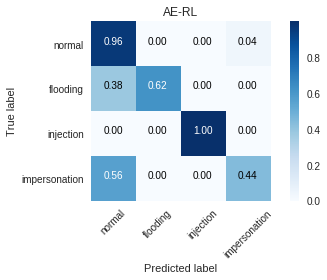

In [100]:
aggregated_data_test = np.array(maped)

print('Performance measures on Test data')
print('Accuracy =  {:.4f}'.format(accuracy_score( aggregated_data_test,actions)))
print('F1 =  {:.4f}'.format(f1_score(aggregated_data_test,actions, average='weighted')))
print('Precision_score =  {:.4f}'.format(precision_score(aggregated_data_test,actions, average='weighted')))
print('recall_score =  {:.4f}'.format(recall_score(aggregated_data_test,actions, average='weighted')))

cnf_matrix = confusion_matrix(aggregated_data_test,actions)
np.set_printoptions(precision=2)
plt.figure()
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=env.attack_types, normalize=True,
                      title='AE-RL')
plt.tight_layout()
plt.savefig('results/confusion_matrix_adversarial.tif', format='tif', dpi=100)

In [101]:
print(classification_report(aggregated_data_test,actions,target_names=['normal', 'flooding', 'injection', 'impersonation']))

               precision    recall  f1-score   support

       normal       0.97      0.96      0.97    530785
     flooding       0.95      0.62      0.75      8097
    injection       0.94      1.00      0.97     16682
impersonation       0.32      0.44      0.37     20079

    micro avg       0.94      0.94      0.94    575643
    macro avg       0.79      0.75      0.76    575643
 weighted avg       0.95      0.94      0.94    575643



In [102]:
#['normal', 'flooding', 'injection', 'impersonation']
mapa = {0:'normal', 1:'flooding', 2:'injection',3:'impersonation'}
yt_app = pd.Series(maped).map(mapa)

perf_per_class = pd.DataFrame(index=range(len(yt_app.unique())),columns=['name', 'acc','f1', 'pre','rec'])
for i,x in enumerate(pd.Series(yt_app).value_counts().index):
    y_test_hat_check = pd.Series(actions).map(mapa).copy()
    y_test_hat_check[y_test_hat_check != x] = 'OTHER'
    yt_app = pd.Series(maped).map(mapa).copy()
    yt_app[yt_app != x] = 'OTHER'
    ac=accuracy_score( yt_app,y_test_hat_check)
    f1=f1_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    pr=precision_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    re=recall_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    perf_per_class.iloc[i]=[x,ac,f1,pr,re]
    
print("\r\nOne vs All metrics: \r\n{}".format(perf_per_class))



One vs All metrics: 
            name       acc        f1       pre       rec
0         normal  0.940046  0.967311   0.97266   0.96202
1  impersonation  0.947909  0.370333  0.320154  0.439165
2      injection  0.998011  0.966818   0.93582   0.99994
3       flooding  0.994127  0.747555  0.945242  0.618254


# Keras MLP

In [0]:
import keras
from keras.models import Sequential

In [0]:
y = train['labels']
x = train.drop(['labels'],axis=1)

In [45]:
print(x.shape)
print(y.shape)

(1795575, 46)
(1795575,)


In [0]:
y = pd.get_dummies(y)

In [47]:
print(x.shape)
print(y.shape)

(1795575, 46)
(1795575, 4)


In [0]:
keras.backend.clear_session()

In [49]:
model = Sequential()
model.add(Dense(100,input_shape=(x.shape[1],) ))
model.add(Dense(100))
model.add(Dense(y.shape[1]))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4700      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 404       
Total params: 15,204
Trainable params: 15,204
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='mse',metrics=['acc'])

In [51]:
model.fit(x=x,y=y,epochs=2,shuffle=True)

Epoch 1/2
1795575/1795575 [==============================] - 217s 121us/step - loss: 0.0172 - acc: 0.9701
Epoch 2/2
1795575/1795575 [==============================] - 217s 121us/step - loss: 0.0169 - acc: 0.9701


In [0]:
y_test = test['labels']
x_test = test.drop(['labels'],axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()

In [0]:
y_test_e = le.fit_transform(y_test)

In [0]:
preds = model.predict(x=x_test)

## Results really overfitted

In [57]:
print(classification_report(y_test_e,np.argmax(preds,axis=-1),target_names=le.classes_))

               precision    recall  f1-score   support

     flooding       0.99      0.04      0.08      8097
impersonation       0.00      0.00      0.00     20079
    injection       0.92      1.00      0.96     16682
       normal       0.95      0.99      0.97    530785

    micro avg       0.95      0.95      0.95    575643
    macro avg       0.72      0.51      0.50    575643
 weighted avg       0.92      0.95      0.93    575643



In [58]:
print('Performance measures on Test data')
print('Accuracy =  {:.4f}'.format(accuracy_score(y_test_e,np.argmax(preds,axis=-1))))
print('F1 =  {:.4f}'.format(f1_score(y_test_e,np.argmax(preds,axis=-1), average='weighted')))
print('Precision_score =  {:.4f}'.format(precision_score(y_test_e,np.argmax(preds,axis=-1), average='weighted')))
print('recall_score =  {:.4f}'.format(recall_score(y_test_e,np.argmax(preds,axis=-1), average='weighted')))

Performance measures on Test data
Accuracy =  0.9466
F1 =  0.9250
Precision_score =  0.9169
recall_score =  0.9466


In [59]:
le.classes_

array(['flooding', 'impersonation', 'injection', 'normal'], dtype=object)

Normalized confusion matrix
[[9.95e-01 3.77e-06 2.78e-03 2.62e-03]
 [9.40e-01 4.00e-02 0.00e+00 2.04e-02]
 [5.99e-05 0.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 3.49e-04]]


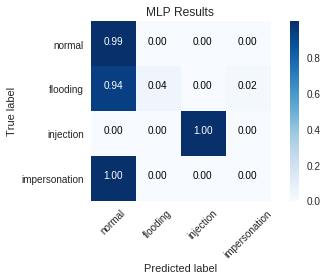

In [60]:
order = ['normal', 'flooding', 'injection', 'impersonation']
permute_dict = {0:1,1:3,2:2,3:0}


y_test_e_permuted = np.vectorize(permute_dict.get)(y_test_e)
predictions_permuted = np.vectorize(permute_dict.get)(np.argmax(preds,axis=-1))

cnf_matrix = confusion_matrix(y_test_e_permuted,predictions_permuted)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=order, normalize=True,
                      title='MLP Results')
plt.tight_layout()
plt.savefig('results/confusion_matrix_keras.tif', format='tif', dpi=100)

## Results with random batches

In [0]:
keras.backend.clear_session()

In [62]:
model = Sequential()
model.add(Dense(100,input_shape=(x.shape[1],) ))
model.add(Dense(100))
model.add(Dense(y.shape[1]))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4700      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 404       
Total params: 15,204
Trainable params: 15,204
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='mse',metrics=['acc'])

In [64]:
model.fit(x=x,y=y,steps_per_epoch=100,epochs=5,shuffle=True)

Epoch 1/5
100/100 [==============================] - 93s 928ms/step - loss: 0.0784 - acc: 0.9043
Epoch 2/5
100/100 [==============================] - 92s 922ms/step - loss: 0.0179 - acc: 0.9708
Epoch 3/5
100/100 [==============================] - 92s 925ms/step - loss: 0.0168 - acc: 0.9702
Epoch 4/5
100/100 [==============================] - 93s 927ms/step - loss: 0.0168 - acc: 0.9702
Epoch 5/5
100/100 [==============================] - 92s 923ms/step - loss: 0.0168 - acc: 0.9702


In [0]:
preds = model.predict(x=x_test)

In [66]:
print(classification_report(y_test_e,np.argmax(preds,axis=-1),target_names=le.classes_))

               precision    recall  f1-score   support

     flooding       0.99      0.04      0.08      8097
impersonation       0.09      0.00      0.00     20079
    injection       0.92      1.00      0.96     16682
       normal       0.95      1.00      0.97    530785

    micro avg       0.95      0.95      0.95    575643
    macro avg       0.74      0.51      0.50    575643
 weighted avg       0.92      0.95      0.93    575643



In [67]:
print('Performance measures on Test data')
print('Accuracy =  {:.4f}'.format(accuracy_score(y_test_e,np.argmax(preds,axis=-1))))
print('F1 =  {:.4f}'.format(f1_score(y_test_e,np.argmax(preds,axis=-1), average='weighted')))
print('Precision_score =  {:.4f}'.format(precision_score(y_test_e,np.argmax(preds,axis=-1), average='weighted')))
print('recall_score =  {:.4f}'.format(recall_score(y_test_e,np.argmax(preds,axis=-1), average='weighted')))

Performance measures on Test data
Accuracy =  0.9488
F1 =  0.9259
Precision_score =  0.9195
recall_score =  0.9488


Normalized confusion matrix
[[9.97e-01 3.77e-06 2.88e-03 1.39e-04]
 [9.60e-01 4.00e-02 0.00e+00 0.00e+00]
 [5.99e-05 0.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 3.49e-04]]


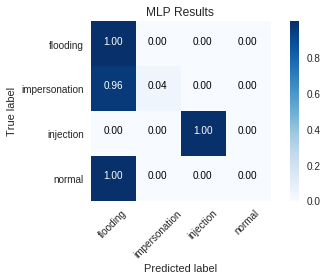

In [68]:
order = ['normal', 'flooding', 'injection', 'impersonation']
permute_dict = {0:1,1:3,2:2,3:0}


y_test_e_permuted = np.vectorize(permute_dict.get)(y_test_e)
predictions_permuted = np.vectorize(permute_dict.get)(np.argmax(preds,axis=-1))

cnf_matrix = confusion_matrix(y_test_e_permuted,predictions_permuted)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_, normalize=True,
                      title='MLP Results')
plt.tight_layout()
plt.savefig('results/confusion_matrix_keras2.tif', format='tif', dpi=100)

### SMOTE

In [0]:
import gc

In [0]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling  import ClusterCentroids

In [71]:
print(x.values.shape)
print(y.values.shape)

(1795575, 46)
(1795575, 4)


In [0]:
X_resampled, y_resampled = SMOTE().fit_resample(x.values, y.values)

In [0]:
indices = np.random.randint(0,y_resampled.shape[0],1000000)

In [0]:
sub_X = X_resampled[indices]
sub_y = y_resampled[indices]

In [75]:
sub_y.sum(axis=0)

array([250113, 250094, 250311, 249482])

In [0]:
keras.backend.clear_session()

In [77]:
gc.collect()

0

In [78]:
y_resampled.shape

(6532760, 4)

In [79]:
model = Sequential()
model.add(Dense(100,input_shape=(sub_X.shape[1],) ))
model.add(Dense(100))
model.add(Dense(sub_y.shape[1]))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4700      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 404       
Total params: 15,204
Trainable params: 15,204
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(optimizer='adam',loss=huber_loss,metrics=['acc'])
model.fit(x=sub_X,y=sub_y,steps_per_epoch=100,epochs=20,shuffle=True)

Epoch 1/20
100/100 [==============================] - 30s 301ms/step - loss: 0.0285 - acc: 0.8910
Epoch 2/20
100/100 [==============================] - 30s 298ms/step - loss: 0.0106 - acc: 0.9493
Epoch 3/20
100/100 [==============================] - 30s 298ms/step - loss: 0.0105 - acc: 0.9513
Epoch 4/20
100/100 [==============================] - 30s 298ms/step - loss: 0.0105 - acc: 0.9524
Epoch 5/20
100/100 [==============================] - 30s 301ms/step - loss: 0.0105 - acc: 0.9532
Epoch 6/20
100/100 [==============================] - 30s 299ms/step - loss: 0.0105 - acc: 0.9534
Epoch 7/20
100/100 [==============================] - 30s 299ms/step - loss: 0.0105 - acc: 0.9533
Epoch 8/20
100/100 [==============================] - 30s 300ms/step - loss: 0.0105 - acc: 0.9531
Epoch 9/20
100/100 [==============================] - 30s 301ms/step - loss: 0.0105 - acc: 0.9530
Epoch 10/20
100/100 [==============================] - 30s 299ms/step - loss: 0.0104 - acc: 0.9529
Epoch 11/20
100/100

In [0]:
preds = model.predict(x=x_test)

In [82]:
print(classification_report(y_test_e,np.argmax(preds,axis=-1),target_names=le.classes_))

               precision    recall  f1-score   support

     flooding       0.60      0.62      0.61      8097
impersonation       0.34      0.93      0.50     20079
    injection       0.41      1.00      0.58     16682
       normal       0.99      0.88      0.93    530785

    micro avg       0.88      0.88      0.88    575643
    macro avg       0.58      0.86      0.65    575643
 weighted avg       0.95      0.88      0.90    575643



In [83]:
print('Performance measures on Test data')
print('Accuracy =  {:.4f}'.format(accuracy_score(y_test_e,np.argmax(preds,axis=-1))))
print('F1 =  {:.4f}'.format(f1_score(y_test_e,np.argmax(preds,axis=-1), average='weighted')))
print('Precision_score =  {:.4f}'.format(precision_score(y_test_e,np.argmax(preds,axis=-1), average='weighted')))
print('recall_score =  {:.4f}'.format(recall_score(y_test_e,np.argmax(preds,axis=-1), average='weighted')))

Performance measures on Test data
Accuracy =  0.8813
F1 =  0.9020
Precision_score =  0.9455
recall_score =  0.8813


Normalized confusion matrix
[[8.80e-01 6.04e-03 4.59e-02 6.82e-02]
 [3.82e-01 6.18e-01 0.00e+00 0.00e+00]
 [5.99e-05 0.00e+00 1.00e+00 0.00e+00]
 [6.52e-02 8.22e-03 0.00e+00 9.27e-01]]


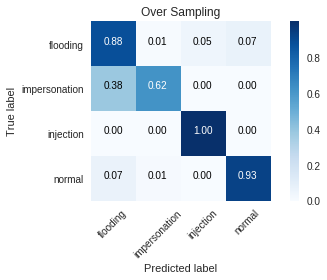

In [84]:
order = ['normal', 'flooding', 'injection', 'impersonation']
permute_dict = {0:1,1:3,2:2,3:0}


y_test_e_permuted = np.vectorize(permute_dict.get)(y_test_e)
predictions_permuted = np.vectorize(permute_dict.get)(np.argmax(preds,axis=-1))

cnf_matrix = confusion_matrix(y_test_e_permuted,predictions_permuted)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_, normalize=True,
                      title='Over Sampling')
plt.tight_layout()
plt.savefig('results/confusion_matrix_keras_OverSampl.tif', format='tif', dpi=100)

### Data distribution

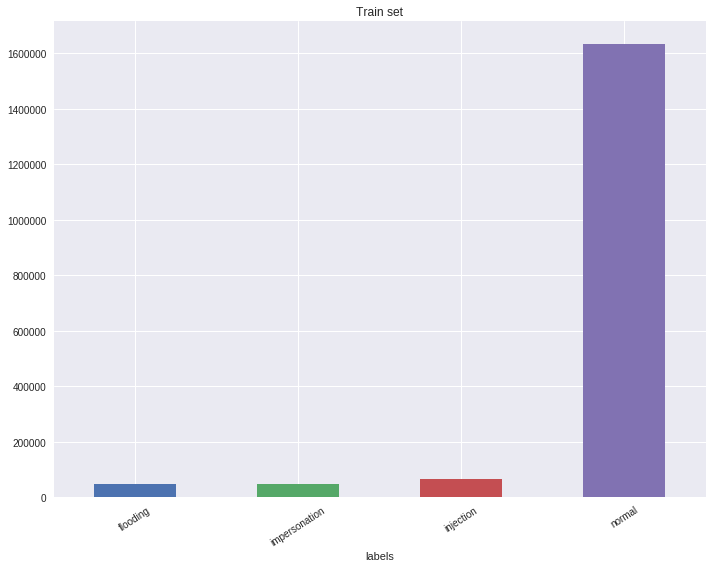

In [85]:
train['labels'].groupby(train['labels']).count().plot(kind="bar",figsize=[10,8],rot=33,title="Train set")
plt.tight_layout()
plt.savefig('results/train_distributio.tif', format='tif', dpi=100)

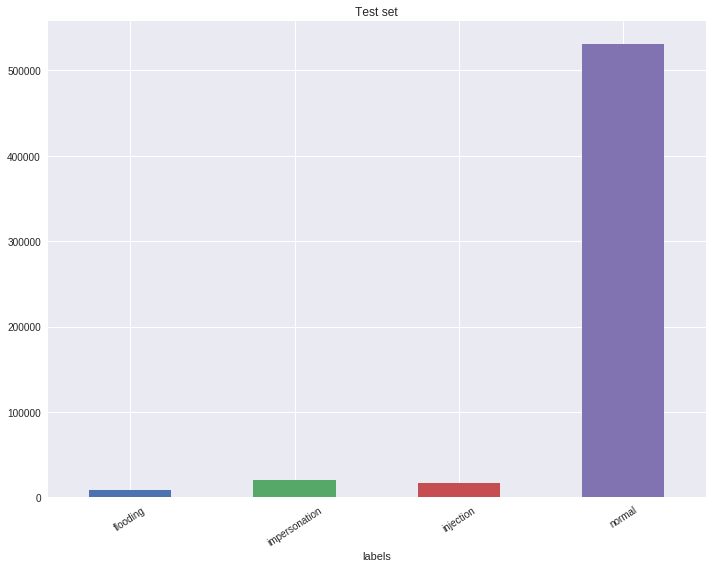

In [86]:
test['labels'].groupby(test['labels']).count().plot(kind="bar",figsize=[10,8],rot=33,title="Test set")
plt.tight_layout()
plt.savefig('results/test_distributio.tif', format='tif', dpi=100)

### Save figures for download

In [103]:
!zip results.zip results/*

  adding: results/Attacks_distribution.svg (deflated 81%)
  adding: results/Attacks_mapped_distribution.tif (deflated 99%)
  adding: results/confusion_matrix_adversarial.tif (deflated 97%)
  adding: results/confusion_matrix_keras2.tif (deflated 97%)
  adding: results/confusion_matrix_keras_OverSampl.tif (deflated 97%)
  adding: results/confusion_matrix_keras.tif (deflated 97%)
  adding: results/test_adv_imp.tif (deflated 99%)
  adding: results/test_distributio.tif (deflated 99%)
  adding: results/train_adv.tif (deflated 96%)
  adding: results/train_distributio.tif (deflated 99%)


In [104]:
!zip AE-RLmodels.zip models/*

  adding: models/defender_agent_model.h5 (deflated 20%)
  adding: models/defender_agent_model.json (deflated 85%)
